# Project: Sales Analysis

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('Datasets/ausapparalsales4thqrt2020.xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


### Grouping the Data

convert the date column into an index so we can aggregate by date components

In [5]:
df.set_index(['Date'], inplace=True, drop=True)
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


## get the total sales every week

In [8]:
df_wk = df.resample('W').sum(numeric_only=True)
df_wk 

,Unit,Sales
Date,,
2020-10-04,6018,15045000
2020-10-11,10801,27002500
2020-10-18,10656,26640000
2020-10-25,10726,26815000
2020-11-01,8723,21807500
2020-11-08,8346,20865000
2020-11-15,8469,21172500
2020-11-22,8445,21112500
2020-11-29,8591,21477500


<Axes: xlabel='Date'>

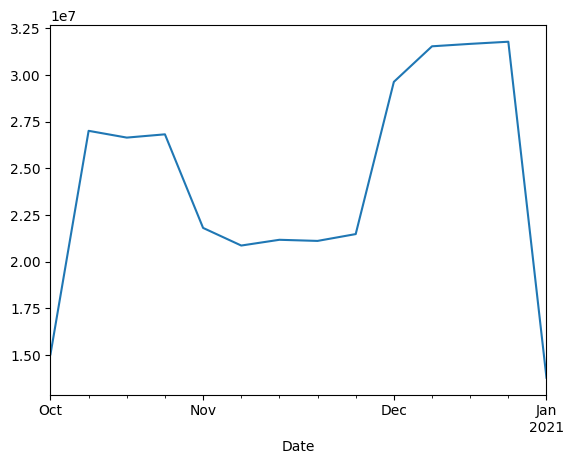

In [9]:
df_wk['Sales'].plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2020-10-04 00:00:00'),
  Text(1, 0, '2020-10-11 00:00:00'),
  Text(2, 0, '2020-10-18 00:00:00'),
  Text(3, 0, '2020-10-25 00:00:00'),
  Text(4, 0, '2020-11-01 00:00:00'),
  Text(5, 0, '2020-11-08 00:00:00'),
  Text(6, 0, '2020-11-15 00:00:00'),
  Text(7, 0, '2020-11-22 00:00:00'),
  Text(8, 0, '2020-11-29 00:00:00'),
  Text(9, 0, '2020-12-06 00:00:00'),
  Text(10, 0, '2020-12-13 00:00:00'),
  Text(11, 0, '2020-12-20 00:00:00'),
  Text(12, 0, '2020-12-27 00:00:00'),
  Text(13, 0, '2021-01-03 00:00:00')])

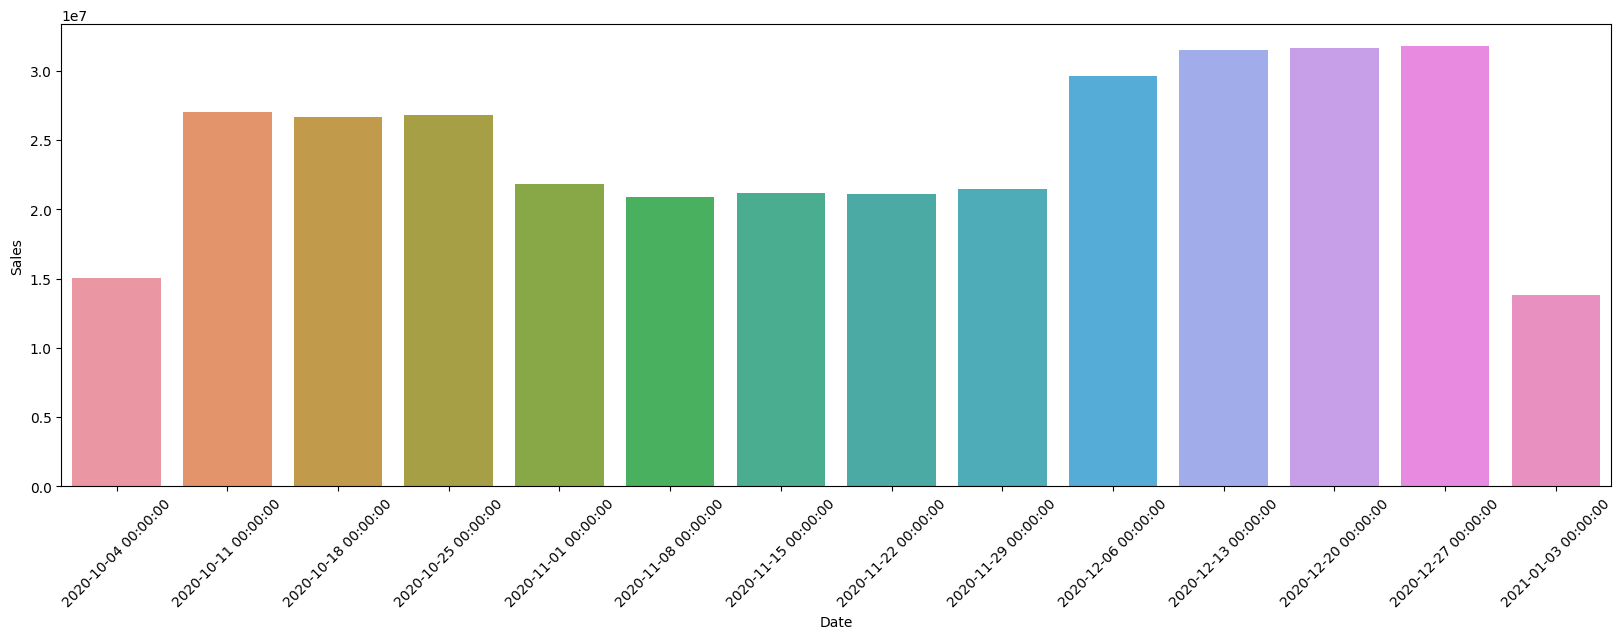

In [13]:

plt.figure(figsize=(20,6))
sns.barplot(x=df_wk.index, data=df_wk, y=df_wk['Sales'])
plt.xticks(rotation=45)

In [14]:
df_mth = df.resample('M').sum(numeric_only=True)
df_mth 

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


Recommendations:
- specify the best month in sales and units
- compare box plots between each month
- maybe replace sum() with mean() to get the average sales per week
- when doing comparison, use subplots
- for which group does the highest sales, aggregate by "group" column 


<Axes: xlabel='Group', ylabel='Sales'>

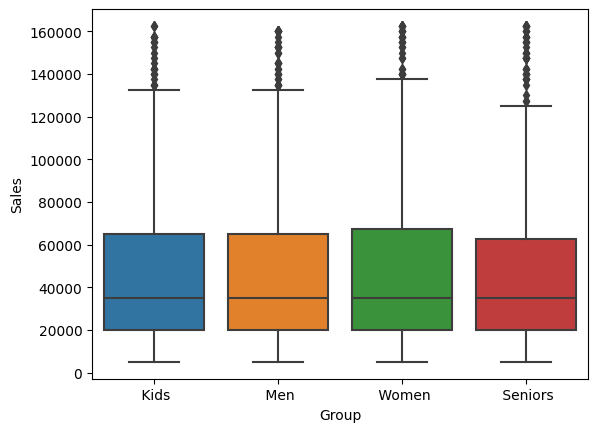

In [15]:
sns.boxplot(x='Group', data=df, y='Sales')

# Project: Marketing Campaign

In [29]:
df = pd.read_csv('Datasets/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Data Cleansing

In [31]:
# remove trailing spaces from col headers
df.columns = df.columns.str.strip()
df.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [32]:
# remove $ and , from the income column
# use the method in the feature eng and preprocessing notebook
df['Income'] = df['Income'].str.replace('\$|,|\.','', regex=True).astype(float)


- let's say we found a good num of nulls and we want to use a sophisticated technique to replace null values (instead of overall mean)
- We can calculate the mean for each group in the data, and the replace the null with its associated group mean

In [28]:
group_agg = df.groupby(['Education', 'Marital_Status'])['Income'].mean() # after you convert marital status to alone vs not alone
group_agg

Education   Marital_Status
2n Cycle    Divorced          4.939513e+06
            Married           4.620110e+06
            Single            5.367394e+06
            Together          4.473641e+06
            Widow             5.139220e+06
Basic       Divorced          9.548000e+05
            Married           2.196050e+06
            Single            1.823867e+06
            Together          2.124007e+06
            Widow             2.212300e+06
Graduation  Absurd            7.924400e+06
            Alone             3.417600e+06
            Divorced          5.452604e+06
            Married           5.080026e+06
            Single            5.132218e+06
            Together          5.575848e+06
            Widow             5.497666e+06
Master      Absurd            6.548700e+06
            Alone             6.133100e+06
            Divorced          5.033195e+06
            Married           5.328603e+06
            Single            5.353056e+06
            Together       

Next, use each average to replace nulls with its associated group (use for loops)

### Hypothesis Analysis
1. Older people are not as tech-savvy and probably prefer shopping in-store.
2. Customers with kids probably have less time to visit a store and would prefer to shop online.
3. Other distribution channels may cannibalize sales at the store.
4. Does the US fare significantly better than the rest of the world in terms of total purchases?

In [ ]:
# hyp analysis 1
#build older people store purchases subset (filter on age and get NumStorePurchases column)
#build older people web purchases (filter on age > 65 and get NumWebPurchases)

# next, compare both groups using independent t-test
# use alternative in the t-test formula to specify greater or smaller